Project Prompt: 

The code below provides a visual representation of how the Black-Scholes call option price changes with respect to time.

a) Use the visualization to interpret how the rate of change of the Black-Scholes call option price behaves as time progresses.

b) Create a separate graphic to visualize how the rate of change of the Black-Scholes call option price depends on the spot price 
.

c) Repeat parts a and b for put option prices.

d) Use the space below to record your observations and reflections based on the generated plots.
____________________________________________________________________________________________________

In this project, I have graphed put/call prices with respect to different variables. The objective is to interpret the rate of change of each of the graphs. 

I first looked at the rate of change of the Black-Scholes call option price as time progresses. To aid in my visualization, I have manually created a "derivative" function that calculates the slopes between consecutive points, and graphed it against the x axis variable. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
#Derivative function
def local_slope(x,y):
    """
    Calculate slope between two points. 
    Args:
        x (array): Array of real numbers
        y (array): Array of real numbers where |x| = |y|. 
    Returns:
        numpy.ndarray: Array of slopes between consecutive points. 
    """
    dx = np.diff(x)
    dy = np.diff(y)
    slopes  = dy /dx 
    return slopes



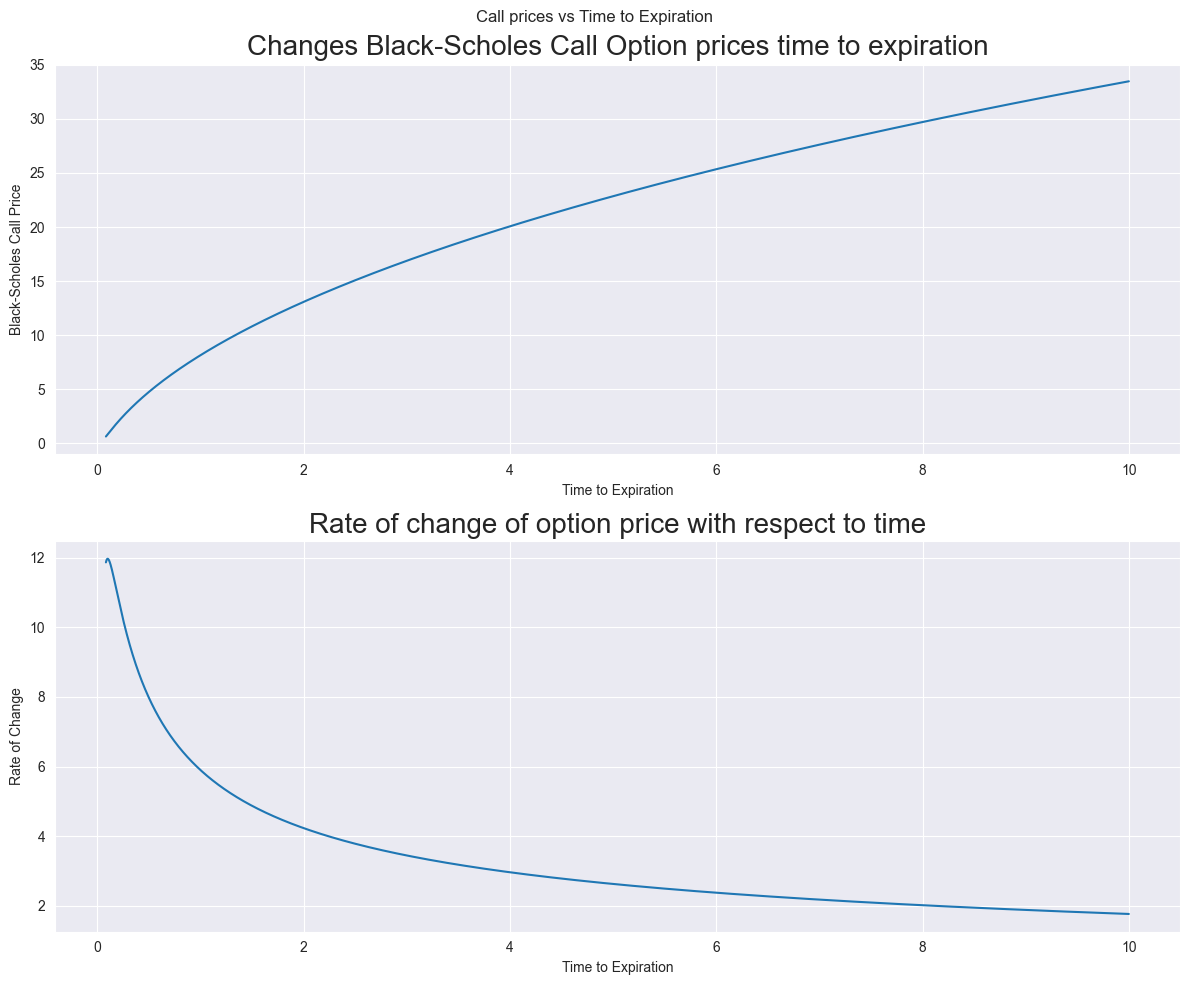

In [15]:
#Black-Scholes Call/Put Price functions
def bs_call(S0, K, sigma, t, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma,t, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
r=0
sigma = .3
times = np.linspace(1/12, 10, 7000)

call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

plt.subplot(2,1,1)
plt.suptitle("Call prices vs Time to Expiration")
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 20)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')

plt.subplot(2,1,2)
plt.title('Rate of change of option price with respect to time', size = 20)
derivative_x_vals = times[:-1]
plt.plot(derivative_x_vals, local_slope(times, call_prices))
y=local_slope(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Rate of Change')
plt.tight_layout()
plt.show()

Fixed Spot Price: 100

Fixed Strike Price: 110

Observations:

1. As t goes to expiration, the rate of change increases rapidly. The intuition behind this movement is that the stock spot price has less time to move above the strike price, rapidly rendering the call option out-of-money and worthless. 

2. As time tends away from expiration, the rate of change drops then slowly decreases. The initial drop in rate of change is likely caused by the increasing probability of an in-the-money outcome. Far from expiration, the stock price has more time to become more valuable, which, in turn, makes the call option more valuable. The rate of change stabilizing and going towards 1 reflects the high probability of an in-the-money outcome. 


Now we do the same procedure for call prices with respect to spot prices:

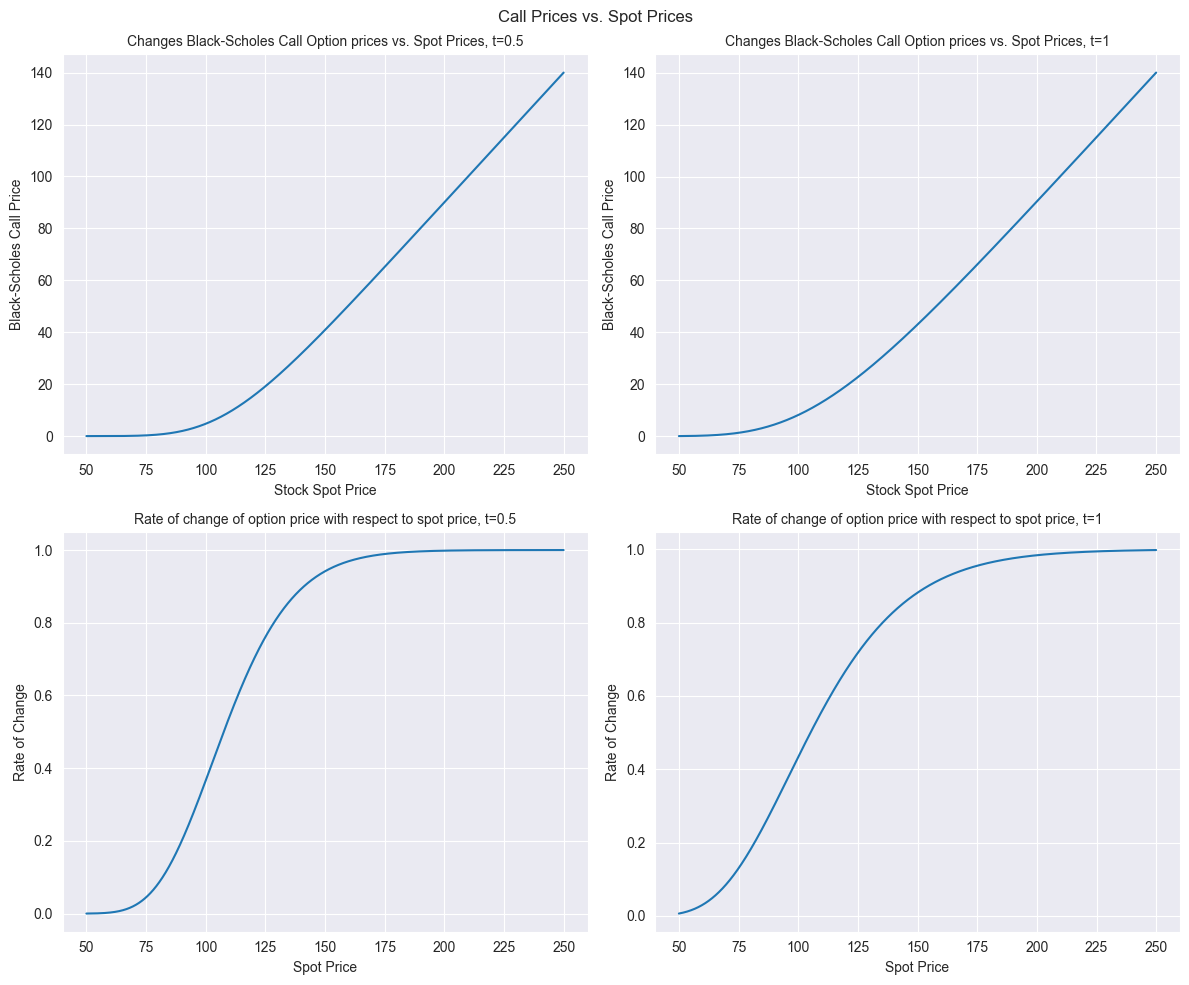

In [19]:

spot_prices = np.linspace(50,250, 7000)
def bs_call_SP(K,sigma, t,S):
    return bs_call(S,K,sigma,t)

t = 6/12
call_prices_wrt_SP = [bs_call_SP(K,sigma, t, S = spot_prices[i]) for i in range(len(spot_prices))]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.suptitle("Call Prices vs. Spot Prices")
plt.subplot(2,2,1)
plt.title(f'Changes Black-Scholes Call Option prices vs. Spot Prices, t={t}', size = 10)
plt.plot(spot_prices, call_prices_wrt_SP)
plt.xlabel('Stock Spot Price')
plt.ylabel('Black-Scholes Call Price')

plt.subplot(2,2,3)
plt.title(f'Rate of change of option price with respect to spot price, t={t}', size = 10)
derivative_x_vals = spot_prices[:-1]
plt.plot(derivative_x_vals, local_slope(spot_prices, call_prices_wrt_SP))
plt.xlabel('Spot Price')
plt.ylabel('Rate of Change')


t = 1
call_prices_wrt_SP = [bs_call_SP(K,sigma, t, S = spot_prices[i]) for i in range(len(spot_prices))]
plt.subplot(2,2,2)
plt.title(f'Changes Black-Scholes Call Option prices vs. Spot Prices, t={t}', size = 10)
plt.plot(spot_prices, call_prices_wrt_SP)
plt.xlabel('Stock Spot Price')
plt.ylabel('Black-Scholes Call Price')

plt.subplot(2,2,4)
plt.title(f'Rate of change of option price with respect to spot price, t={t}', size = 10)
derivative_x_vals = spot_prices[:-1]
plt.plot(derivative_x_vals, local_slope(spot_prices, call_prices_wrt_SP))
plt.xlabel('Spot Price')
plt.ylabel('Rate of Change')




plt.tight_layout()
plt.show()


Fixed strike price: 110

Fixed times: .5, 1

Observations:
1. A smaller t led to a more dramatic first derivative, while things are more steady for a larger t. This can be explained by observations 2 and 3. 

2. For t = .5, the rate of change and call price are both near 0 when spot prices are substantially lower than the strike prices (i.e., < 100). For these prices and this t, the outcome of the call option is very likely to be out-of-the-money, and therefore worthless. For t = 1, the same behavior can be observed, but only for stock values < 75, as the longer time period allows for favorable stock movement. 

3. As spot prices increase to the point that there is a real possibility of an in-the-money outcome within time t, the rate of change rapidly rises before stabilizing at 1. Spot prices where the rate of change stabillizes at 1 reflect the very high probability of an in-the-money outcome within time t, and so call prices linearly become more valuable. 

4. Stock prices between ~75 and ~150 for t = .25 (~75 and ~ 170 for t = 1) are prices where the derivative spike and the outcome of the option is most uncertain. This is where put prices are most sensitive to spot price changes. The derivative hits near-.5 at the at-the-money value in both times. 

The next blocks of code are a repeat of the above procedure+ for put options. 

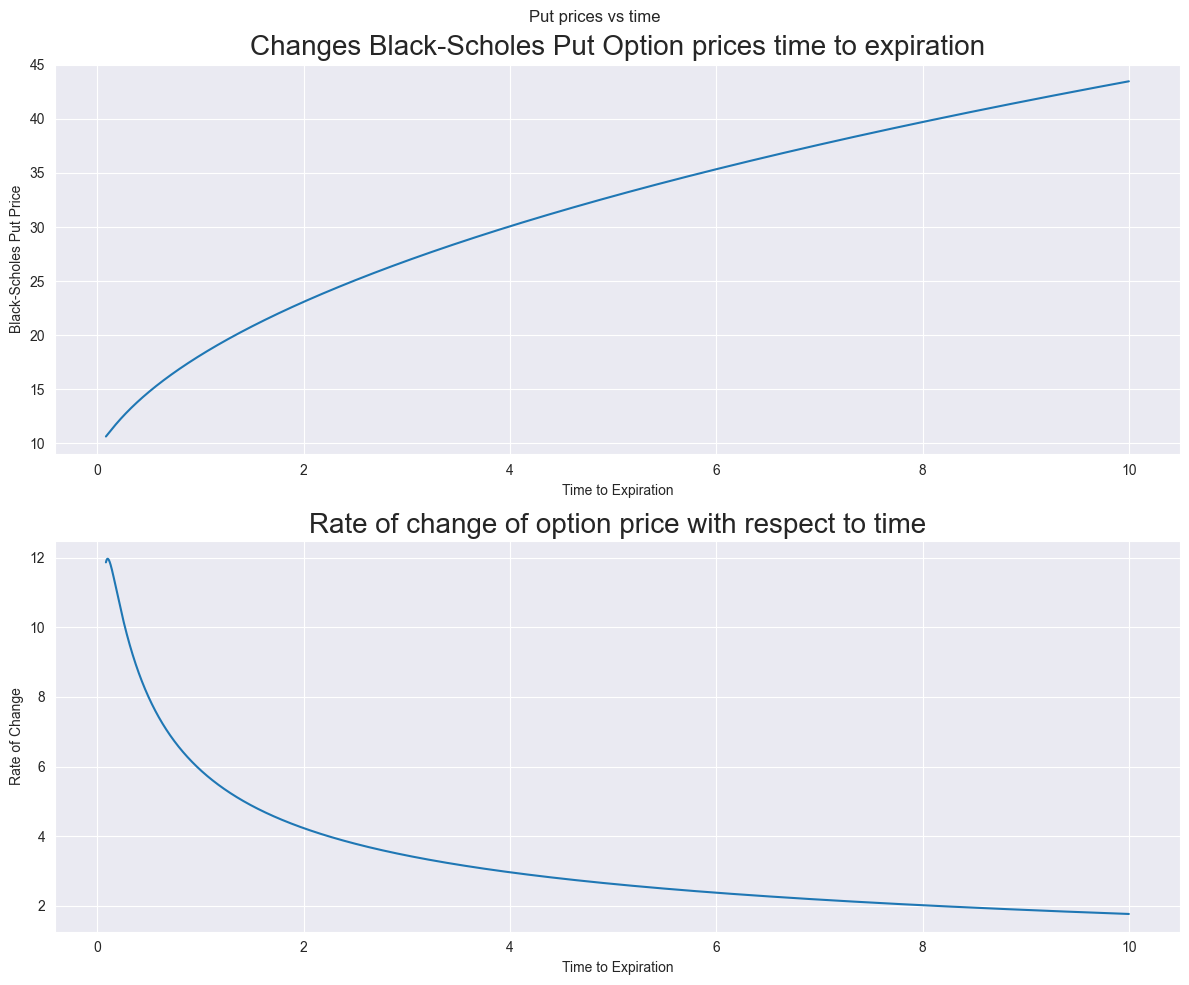

In [16]:
K=110
put_prices = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]

fig2, axes2 = plt.subplots(2, 1, figsize=(12, 10))

plt.subplot(2,1,1)
plt.suptitle("Put prices vs time")
plt.title('Changes Black-Scholes Put Option prices time to expiration', size = 20)
plt.plot(times, put_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')

plt.subplot(2,1,2)
plt.title('Rate of change of option price with respect to time', size = 20)
derivative_x_vals = times[:-1]
plt.plot(derivative_x_vals, local_slope(times, put_prices))
x= local_slope(times, put_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Rate of Change')
plt.tight_layout()
plt.show()

Fixed Spot Price: 100
Fixed Strike Price: 110

Observations:
1. The behavior is analogous to the option prices. Towards 0, the end spot price is more certain and call option prices rapidly decrease to the difference between spot and strike prices, as there is less time for stock movement to move out of an in-the-money outcome. 

2. The slope then rapidly falls as time increases, as this allows for a more profitable stock movement. The prices then begin to increase slowly, as more time allows for more downward stock movement. The slope tends to 1 for large t, representing a high probability of in-the-money outcomes, and therefore, the value of the call option has more linear movement as time increases. 

Text(0, 0.5, 'Rate of Change')

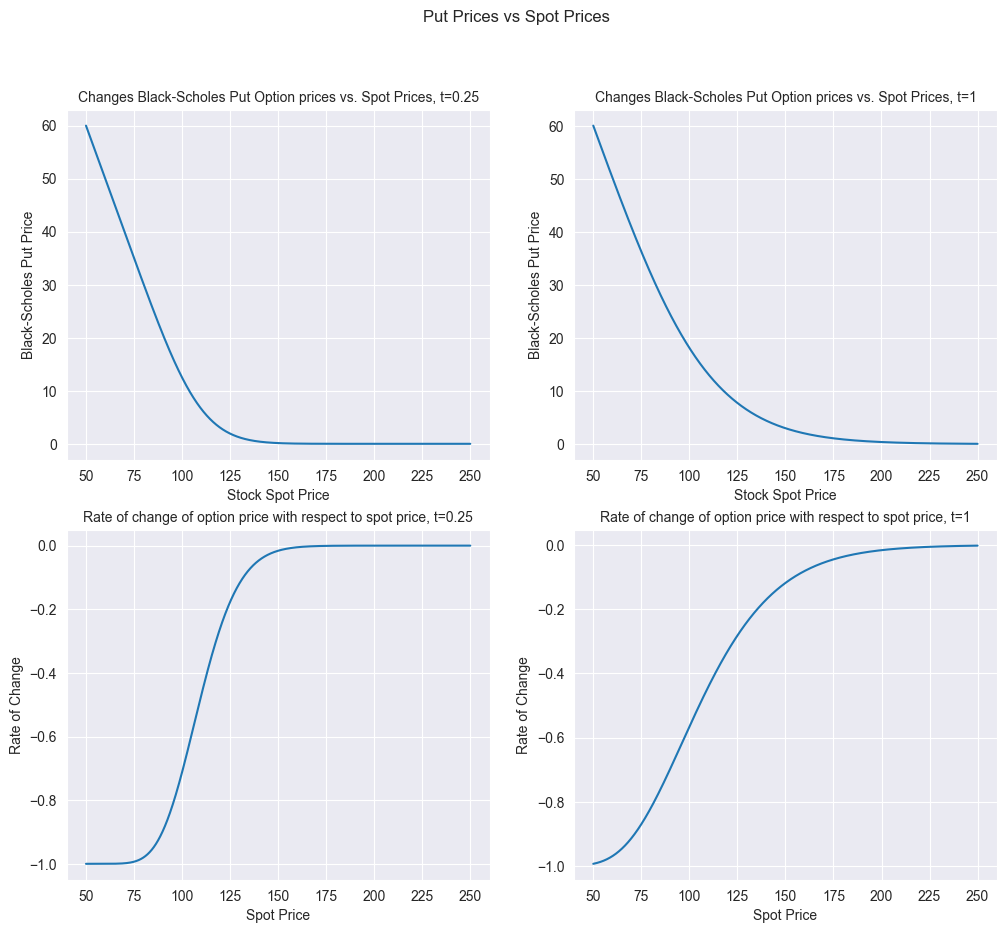

In [17]:
def bs_put_SP(K,sigma, t,S):
    return bs_put(S,K,sigma,t)

t = 3/12
put_prices_wrt_SP = [bs_put_SP(K,sigma, t, S = spot_prices[i]) for i in range(len(spot_prices))]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.suptitle("Put Prices vs Spot Prices")
plt.subplot(2,2,1)
plt.title(f'Changes Black-Scholes Put Option prices vs. Spot Prices, t={t}', size = 10)
plt.plot(spot_prices, put_prices_wrt_SP)
plt.xlabel('Stock Spot Price')
plt.ylabel('Black-Scholes Put Price')

plt.subplot(2,2,3)
plt.title(f'Rate of change of option price with respect to spot price, t={t}', size = 10)
derivative_x_vals = spot_prices[:-1]
plt.plot(derivative_x_vals, local_slope(spot_prices, put_prices_wrt_SP))
plt.xlabel('Spot Price')
plt.ylabel('Rate of Change')


t = 1
put_prices_wrt_SP = [bs_put_SP(K,sigma, t, S = spot_prices[i]) for i in range(len(spot_prices))]
plt.subplot(2,2,2)
plt.title(f'Changes Black-Scholes Put Option prices vs. Spot Prices, t={t}', size = 10)
plt.plot(spot_prices, put_prices_wrt_SP)
plt.xlabel('Stock Spot Price')
plt.ylabel('Black-Scholes Put Price')

plt.subplot(2,2,4)
plt.title(f'Rate of change of option price with respect to spot price, t={t}', size = 10)
derivative_x_vals = spot_prices[:-1]
plt.plot(derivative_x_vals, local_slope(spot_prices, put_prices_wrt_SP))
plt.xlabel('Spot Price')
plt.ylabel('Rate of Change')




Fixed Strike Price: 110

Fixed times: t = .25, t=1

Observations: 

1. As before, a smaller t led to a more dramatic first derivative, while things are more steady for a larger t. This can be explained by observations 2 and 3. 

2. For t = .25, the rate of change is near -1, and call price are both near 0 when spot prices are substantially lower than the strike prices (i.e., < 100). This is because, for this time period and these strike prices, there is a very high probability of an in-the-money outcome equal to the difference between the spot and the strike prices. Thus, the rate of change is linearly decreasing here. For t = 1, the same behavior can be observed, but only for stock values < 75, as the longer time period allows for favorable stock movement. 

3. As spot prices increase to the point that there is a real possibility of an out-of-money outcome within time t, the rate of change rapidly rises before stabilizing at 0. Spot prices where the rate of change stabillizes at 0 reflect the very high probability of an out-of-money outcome within time t, and so call prices are worthless. 

4. Stock prices between ~75 and ~150 for t = .25 (~75 and ~ 170 for t = 1) are prices where the derivative spike and the outcome of the option is most uncertain. This is where put prices are most sensitive to spot price changes. The derivative hits near-.5 at the at-the-money value in both times. 